In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src import Analyzer, DataLoader
import warnings
warnings.simplefilter(action="ignore")

dl = DataLoader()
df_raw = dl.merge_dfs()

In [3]:
# Analyze up to covid
df = df_raw[df_raw["date"]<="2020-02-03"]

In [5]:
import pandas as pd
import numpy as np

def build_returns(group, horizons=[5, 15, 30, 60, 120]):
    group = group.sort_values('date')
    
    # Compute log returns
    group['return_1d'] = np.log(group['prc_adj'] / group['prc_adj'].shift(1))
    
    # Cumulative returns over rolling horizons
    for h in horizons:
        group[f'return_{h}d'] = group['return_1d'].rolling(h, min_periods=1).sum()
    
    return group

# Apply the function groupby ticker
df = df.sort_values(['ticker', 'date'])
df = df.groupby('ticker', group_keys=False).apply(build_returns).reset_index(drop=True)

In [6]:
df

,date,ticker,holders,shrcd,vol,prc_adj,shrout_adj,daily_returns,cumulative_returns,mc,...,market_weight,retail_weight,total_holders_change_pct,total_holders_change_diff,return_1d,return_5d,return_15d,return_30d,return_60d,return_120d
0,2018-05-02,A,590.000000,11.0,2240482.0,65.91,322477000.0,0.000000,0.000000,2.125446e+10,...,0.000630,0.000076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-03,A,586.473684,11.0,2365851.0,66.34,322477000.0,0.006503,0.006503,2.139312e+10,...,0.000636,0.000076,0.002502,13271.210646,0.006503,0.006503,0.006503,0.006503,0.006503,0.006503
2,2018-05-04,A,587.458333,11.0,1331017.0,67.00,322477000.0,0.009900,0.016402,2.160596e+10,...,0.000634,0.000076,-0.000420,-2232.997783,0.009900,0.016402,0.016402,0.016402,0.016402,0.016402
3,2018-05-07,A,585.900000,11.0,1468735.0,67.39,322477000.0,0.005804,0.022206,2.173173e+10,...,0.000635,0.000076,-0.006276,-33360.382142,0.005804,0.022206,0.022206,0.022206,0.022206,0.022206
4,2018-05-08,A,577.125000,11.0,1916103.0,67.37,322477000.0,-0.000297,0.021910,2.172528e+10,...,0.000635,0.000076,0.000954,5038.040492,-0.000297,0.021910,0.021910,0.021910,0.021910,0.021910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581715,2020-01-28,ZYNE,22245.304348,11.0,372662.0,5.20,23211000.0,-0.003839,-0.688328,1.206972e+08,...,0.000003,0.000103,0.003847,45512.124111,-0.003839,-0.091808,-0.143101,-0.148088,-0.499609,-0.777029
2581716,2020-01-29,ZYNE,22254.916667,11.0,456705.0,5.01,23211000.0,-0.037223,-0.725551,1.162871e+08,...,0.000003,0.000099,0.004338,51525.413768,-0.037223,-0.134280,-0.158419,-0.175311,-0.469255,-0.767184
2581717,2020-01-30,ZYNE,22283.291667,11.0,570407.0,5.05,23211000.0,0.007952,-0.717598,1.172156e+08,...,0.000003,0.000099,0.003671,43793.000000,0.007952,-0.098007,-0.131549,-0.112267,-0.501675,-0.762008
2581718,2020-01-31,ZYNE,22309.666667,11.0,367419.0,5.04,23211000.0,-0.001982,-0.719580,1.169834e+08,...,0.000003,0.000099,0.002219,26564.916667,-0.001982,-0.065282,-0.112478,-0.110703,-0.516760,-0.742504


In [7]:
df['y_percentile'] = df['holders_change_pct'].rank(pct=True)

# Clean from extreme values:
df = df[(df["y_percentile"]>=0.01)*(df["y_percentile"]<=0.99)]
df

,date,ticker,holders,shrcd,vol,prc_adj,shrout_adj,daily_returns,cumulative_returns,mc,...,retail_weight,total_holders_change_pct,total_holders_change_diff,return_1d,return_5d,return_15d,return_30d,return_60d,return_120d,y_percentile
1,2018-05-03,A,586.473684,11.0,2365851.0,66.34,322477000.0,0.006503,0.006503,2.139312e+10,...,0.000076,0.002502,13271.210646,0.006503,0.006503,0.006503,0.006503,0.006503,0.006503,0.176548
2,2018-05-04,A,587.458333,11.0,1331017.0,67.00,322477000.0,0.009900,0.016402,2.160596e+10,...,0.000076,-0.000420,-2232.997783,0.009900,0.016402,0.016402,0.016402,0.016402,0.016402,0.663238
3,2018-05-07,A,585.900000,11.0,1468735.0,67.39,322477000.0,0.005804,0.022206,2.173173e+10,...,0.000076,-0.006276,-33360.382142,0.005804,0.022206,0.022206,0.022206,0.022206,0.022206,0.278672
4,2018-05-08,A,577.125000,11.0,1916103.0,67.37,322477000.0,-0.000297,0.021910,2.172528e+10,...,0.000076,0.000954,5038.040492,-0.000297,0.021910,0.021910,0.021910,0.021910,0.021910,0.070506
5,2018-05-09,A,581.208333,11.0,2108506.0,68.13,322477000.0,0.011218,0.033127,2.197036e+10,...,0.000076,0.001308,6918.214015,0.011218,0.033127,0.033127,0.033127,0.033127,0.033127,0.819632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581715,2020-01-28,ZYNE,22245.304348,11.0,372662.0,5.20,23211000.0,-0.003839,-0.688328,1.206972e+08,...,0.000103,0.003847,45512.124111,-0.003839,-0.091808,-0.143101,-0.148088,-0.499609,-0.777029,0.372754
2581716,2020-01-29,ZYNE,22254.916667,11.0,456705.0,5.01,23211000.0,-0.037223,-0.725551,1.162871e+08,...,0.000099,0.004338,51525.413768,-0.037223,-0.134280,-0.158419,-0.175311,-0.469255,-0.767184,0.606888
2581717,2020-01-30,ZYNE,22283.291667,11.0,570407.0,5.05,23211000.0,0.007952,-0.717598,1.172156e+08,...,0.000099,0.003671,43793.000000,0.007952,-0.098007,-0.131549,-0.112267,-0.501675,-0.762008,0.645553
2581718,2020-01-31,ZYNE,22309.666667,11.0,367419.0,5.04,23211000.0,-0.001982,-0.719580,1.169834e+08,...,0.000099,0.002219,26564.916667,-0.001982,-0.065282,-0.112478,-0.110703,-0.516760,-0.742504,0.641455


In [8]:
lags = [1,2,3,4]

for lag in lags:
    df[f"y_lag_{lag}"] = df["holders_change_pct"].shift(lag)

df.sort_index()

,date,ticker,holders,shrcd,vol,prc_adj,shrout_adj,daily_returns,cumulative_returns,mc,...,return_5d,return_15d,return_30d,return_60d,return_120d,y_percentile,y_lag_1,y_lag_2,y_lag_3,y_lag_4
1,2018-05-03,A,586.473684,11.0,2365851.0,66.34,322477000.0,0.006503,0.006503,2.139312e+10,...,0.006503,0.006503,0.006503,0.006503,0.006503,0.176548,NaN,NaN,NaN,NaN
2,2018-05-04,A,587.458333,11.0,1331017.0,67.00,322477000.0,0.009900,0.016402,2.160596e+10,...,0.016402,0.016402,0.016402,0.016402,0.016402,0.663238,-0.005995,NaN,NaN,NaN
3,2018-05-07,A,585.900000,11.0,1468735.0,67.39,322477000.0,0.005804,0.022206,2.173173e+10,...,0.022206,0.022206,0.022206,0.022206,0.022206,0.278672,0.001678,-0.005995,NaN,NaN
4,2018-05-08,A,577.125000,11.0,1916103.0,67.37,322477000.0,-0.000297,0.021910,2.172528e+10,...,0.021910,0.021910,0.021910,0.021910,0.021910,0.070506,-0.002656,0.001678,-0.005995,NaN
5,2018-05-09,A,581.208333,11.0,2108506.0,68.13,322477000.0,0.011218,0.033127,2.197036e+10,...,0.033127,0.033127,0.033127,0.033127,0.033127,0.819632,-0.015090,-0.002656,0.001678,-0.005995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581715,2020-01-28,ZYNE,22245.304348,11.0,372662.0,5.20,23211000.0,-0.003839,-0.688328,1.206972e+08,...,-0.091808,-0.143101,-0.148088,-0.499609,-0.777029,0.372754,0.000260,0.001081,0.002677,0.003462
2581716,2020-01-29,ZYNE,22254.916667,11.0,456705.0,5.01,23211000.0,-0.037223,-0.725551,1.162871e+08,...,-0.134280,-0.158419,-0.175311,-0.469255,-0.767184,0.606888,-0.000609,0.000260,0.001081,0.002677
2581717,2020-01-30,ZYNE,22283.291667,11.0,570407.0,5.05,23211000.0,0.007952,-0.717598,1.172156e+08,...,-0.098007,-0.131549,-0.112267,-0.501675,-0.762008,0.645553,0.000432,-0.000609,0.000260,0.001081
2581718,2020-01-31,ZYNE,22309.666667,11.0,367419.0,5.04,23211000.0,-0.001982,-0.719580,1.169834e+08,...,-0.065282,-0.112478,-0.110703,-0.516760,-0.742504,0.641455,0.001274,0.000432,-0.000609,0.000260


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df = df.sort_values(by="date")


cols = [
# "y_lag_1",
# "y_lag_2",
# "y_lag_3",
# "y_lag_4",
 "y_percentile",
 'holders',
 'shrcd',
 'vol',
 'prc_adj',
 'shrout_adj',
 'cumulative_returns',
 'mc',
 'total_holders',
 'retail_weight',
 'total_holders_change_pct',
 'return_1d', 
 'return_5d', 
# 'return_15d', 
# 'return_30d', 
# 'return_60d', 
# 'return_120d'
# 'std_2d', 
# 'std_5d', 
# 'std_15d', 
# 'std_30d', 
# 'std_60d', 
# 'std_120d'
 ]

# Define input (X) and target (y)
X = df[cols]


y = df['holders_change_pct']


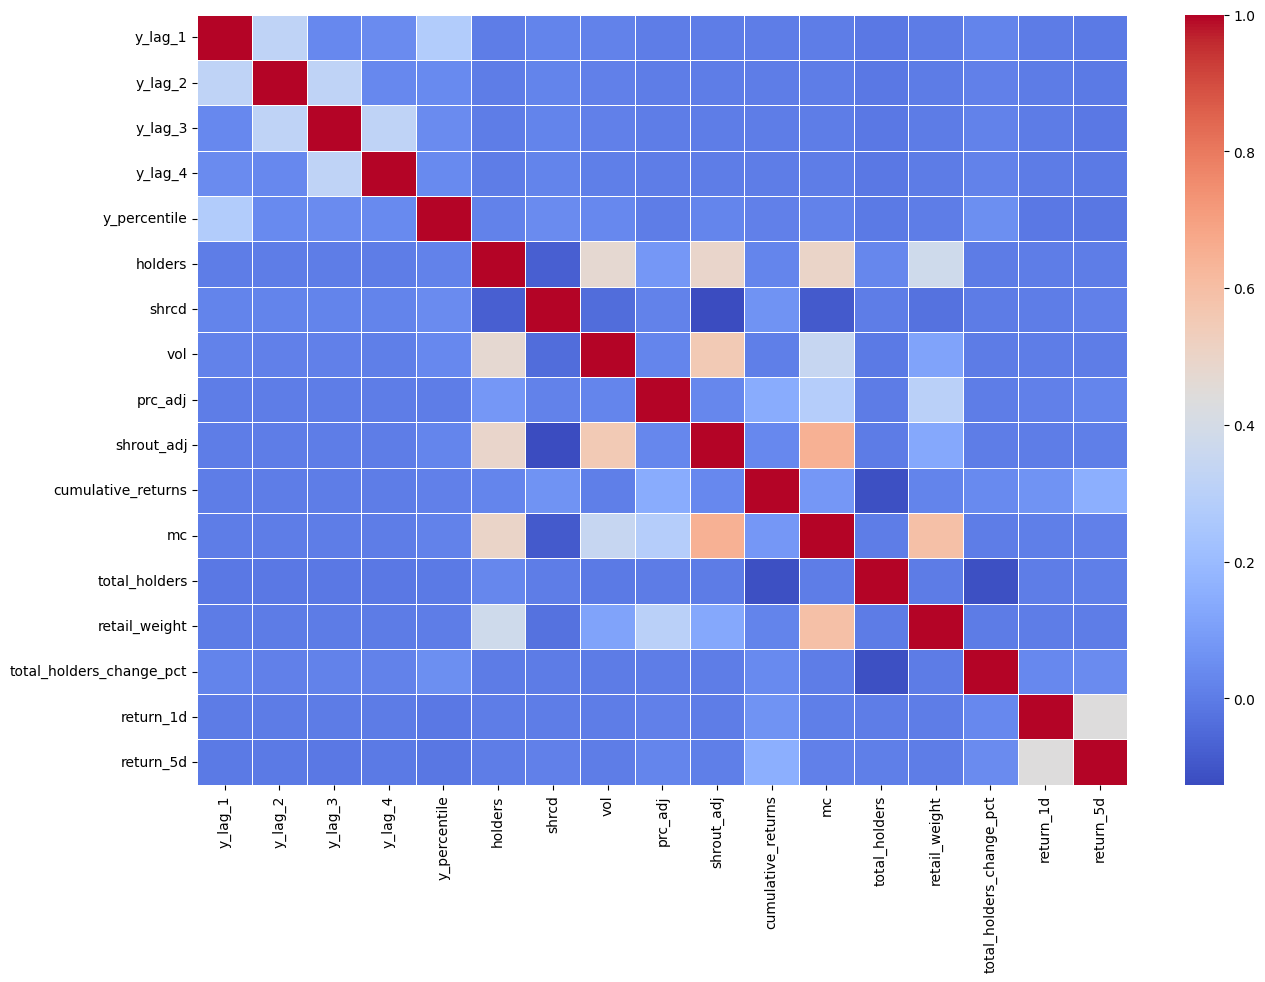

In [16]:
# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(X.corr(), cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

In [20]:
import statsmodels.api as sm
import pandas as pd



# Refit OLS on selected features
X = sm.add_constant(X)  # exclude const
model = sm.OLS(y, X).fit()

# Print p-values
print(model.summary())





                            OLS Regression Results                            
Dep. Variable:     holders_change_pct   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                 3.186e+05
Date:                Sun, 30 Mar 2025   Prob (F-statistic):               0.00
Time:                        09:45:40   Log-Likelihood:             7.8858e+06
No. Observations:             2323720   AIC:                        -1.577e+07
Df Residuals:                 2323706   BIC:                        -1.577e+07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

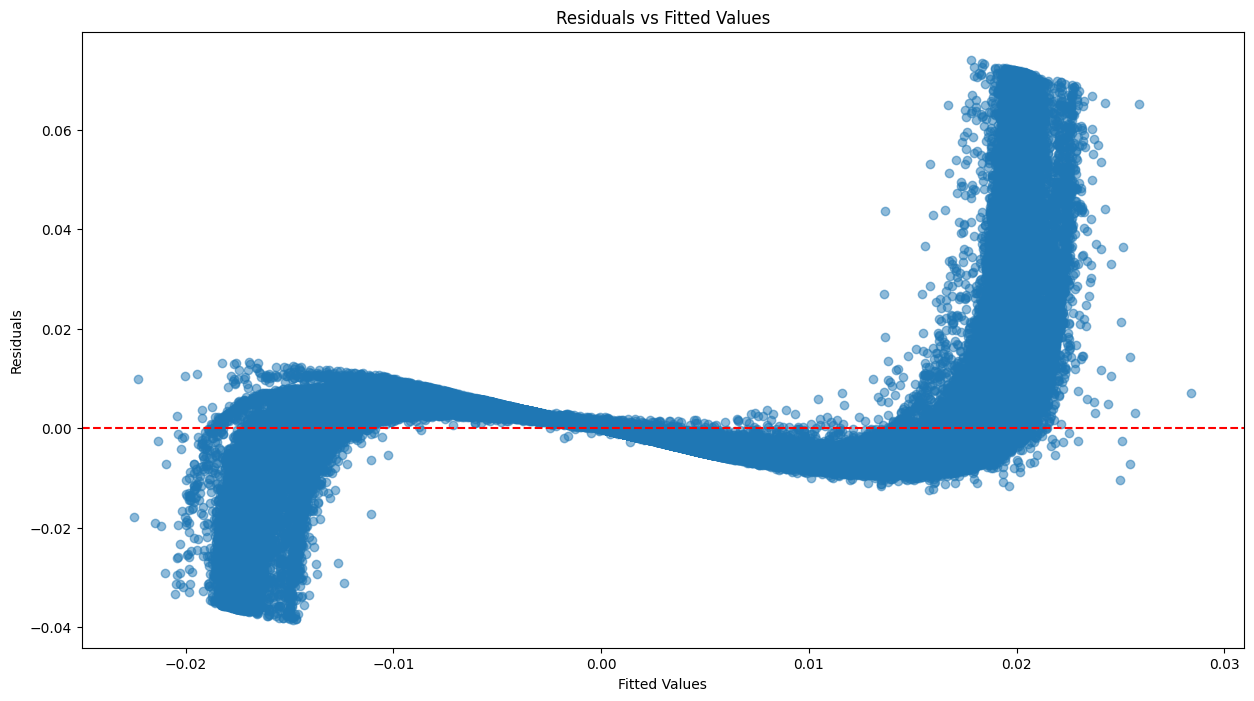

In [21]:
# Create a scatter plot of residuals
plt.figure(figsize=(15, 8))
plt.scatter(model.fittedvalues, model.resid, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at 0
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [22]:
model.resid.describe()

count    2.323720e+06
mean    -5.574586e-08
std      8.127243e-03
min     -3.853506e-02
25%     -5.379069e-03
50%     -6.375625e-04
75%      4.158135e-03
max      7.405920e-02
dtype: float64

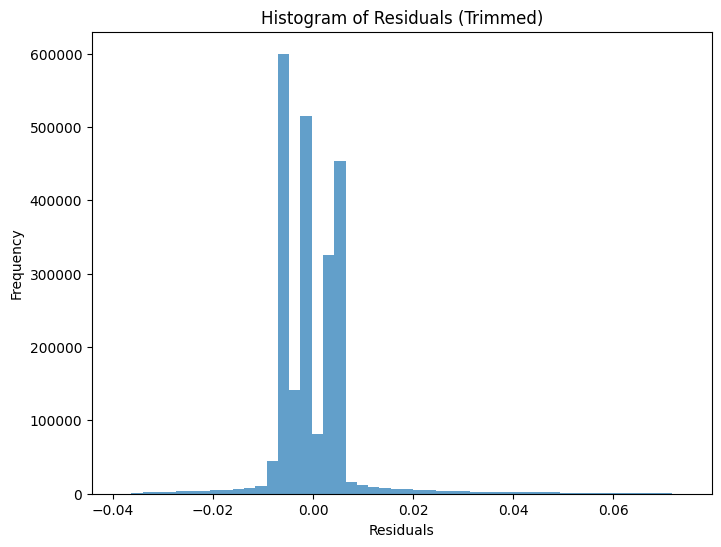

In [24]:
# Trim residuals (optional) to remove extreme values for better visualization
trimmed_residuals = model.resid[abs(model.resid) < 5]  # Adjust the threshold as needed

plt.figure(figsize=(8, 6))
plt.hist(trimmed_residuals, bins=50, alpha=0.7)
plt.title('Histogram of Residuals (Trimmed)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
